In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np

In [8]:
def distance_l1(x, y):
    return abs(x - y)

def distance_l2(x, y):
    return (x - y) ** 2

In [4]:
def pixel_wise_matching_l1(left_img, right_img, disparity_range, save_result=True):
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255

    for y in range(height):
        for x in range(width):
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 else distance_l1(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min = cost
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result...')
        cv2.imwrite('pixel_wise_l1.png', depth)
        cv2.imwrite('pixel_wise_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
        print('Done.')

    return depth

In [5]:
def pixel_wise_matching_l2(left_img, right_img, disparity_range, save_result=True):
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255 ** 2

    for y in range(height):
        for x in range(width):
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 else distance_l2(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min = cost
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result...')
        cv2.imwrite('pixel_wise_l2.png', depth)
        cv2.imwrite('pixel_wise_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
        print('Done.')

    return depth

In [9]:
left_img_path = '/content/drive/MyDrive/AI/Bai_tap/Project/tsukuba/left.png'
right_img_path = '/content/drive/MyDrive/AI/Bai_tap/Project/tsukuba/right.png'
disparity_range = 16

# Tính toán bằng phương pháp L1
pixel_wise_result_l1 = pixel_wise_matching_l1(left_img_path, right_img_path, disparity_range)

# Tính toán bằng phương pháp L2
pixel_wise_result_l2 = pixel_wise_matching_l2(left_img_path, right_img_path, disparity_range)

Saving result...
Done.
Saving result...
Done.


In [10]:
import matplotlib.pyplot as plt

In [14]:
def display_side_by_side(image1, image2, title1='Image 1', title2='Image 2'):
    fig, axes = plt.subplots(1, 2, figsize=(15, 10))

    # Hiển thị hình ảnh grayscale
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title(title1)
    axes[0].axis('off')

    # Hiển thị hình ảnh color map
    axes[1].imshow(cv2.applyColorMap(image2, cv2.COLORMAP_JET))
    axes[1].set_title(title2)
    axes[1].axis('off')

    plt.show()

Saving result...
Done.


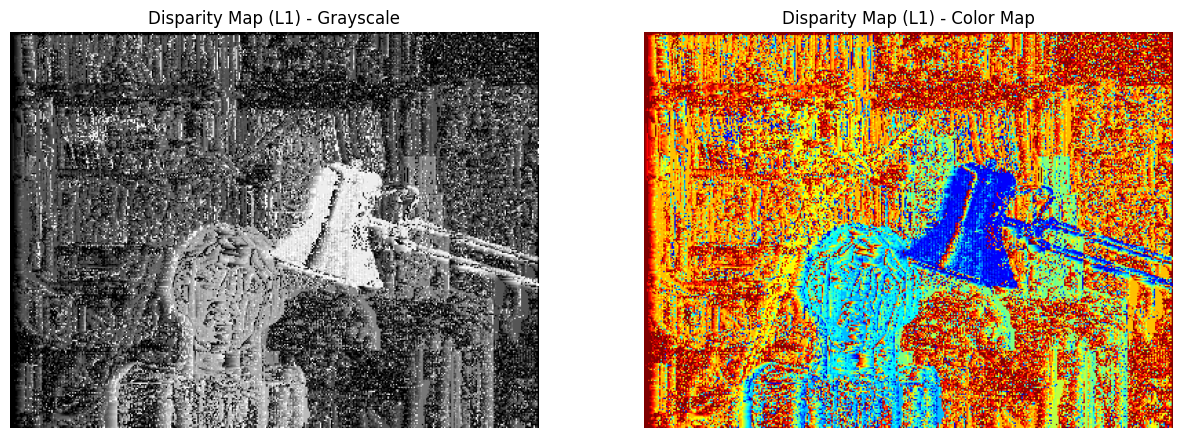

In [15]:
# Tính toán bằng phương pháp L1
pixel_wise_result_l1 = pixel_wise_matching_l1(left_img_path, right_img_path, disparity_range)

# Hiển thị hình ảnh grayscale và color map của disparity map cạnh nhau
display_side_by_side(pixel_wise_result_l1, pixel_wise_result_l1,
                     title1='Disparity Map (L1) - Grayscale',
                     title2='Disparity Map (L1) - Color Map')

Saving result...
Done.


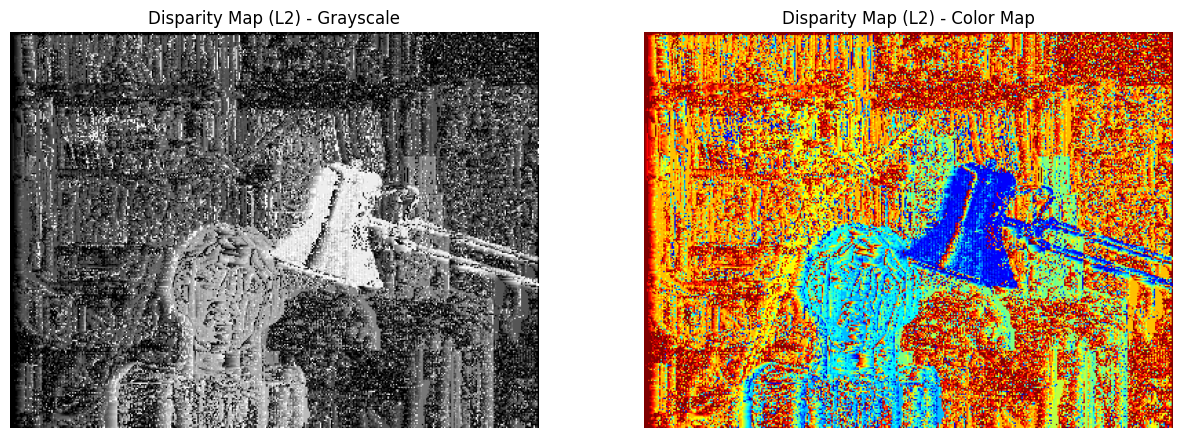

In [16]:
# Tính toán bằng phương pháp L2
pixel_wise_result_l2 = pixel_wise_matching_l2(left_img_path, right_img_path, disparity_range)

# Hiển thị hình ảnh grayscale và color map của disparity map cạnh nhau
display_side_by_side(pixel_wise_result_l2, pixel_wise_result_l2,
                     title1='Disparity Map (L2) - Grayscale',
                     title2='Disparity Map (L2) - Color Map')

In [ ]:
# Problem 2

In [17]:
def distance_l1(x, y):
    return abs(x - y)

def distance_l2(x, y):
    return (x - y) ** 2

In [18]:
import cv2
import numpy as np

def window_based_matching_l1(left_img, right_img, disparity_range, kernel_size=3, save_result=True):
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)
    kernel_half = (kernel_size - 1) // 2
    scale = 3
    max_value = 255 * kernel_size ** 2

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            disparity = 0
            cost_min = 65534

            for j in range(disparity_range):
                total = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = distance_l1(int(left[y + v, x + u]), int(right[y + v, x + u - j]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result...')
        cv2.imwrite('window_based_l1.png', depth)
        cv2.imwrite('window_based_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
        print('Done.')

    return depth

In [21]:
def window_based_matching_l2(left_img, right_img, disparity_range, kernel_size=3, save_result=True):
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)
    kernel_half = (kernel_size - 1) // 2
    scale = 3
    max_value = 255 ** 2 * kernel_size ** 2

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            disparity = 0
            cost_min = 65534

            for j in range(disparity_range):
                total = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = distance_l2(int(left[y + v, x + u]), int(right[y + v, x + u - j]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result:
        print('Saving result...')
        cv2.imwrite('window_based_l2.png', depth)
        cv2.imwrite('window_based_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
        print('Done.')

    return depth

Saving result...
Done.
Saving result...
Done.


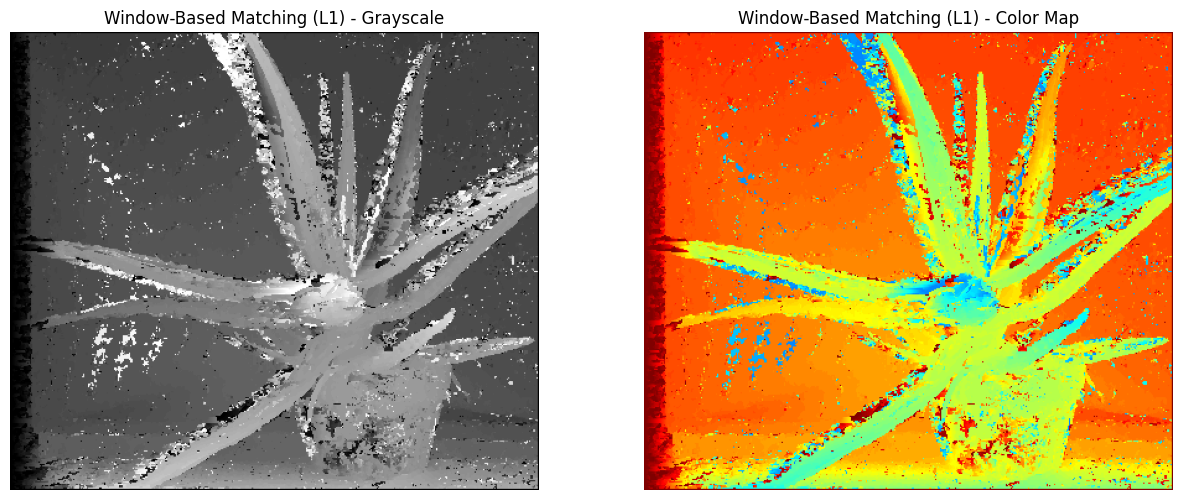

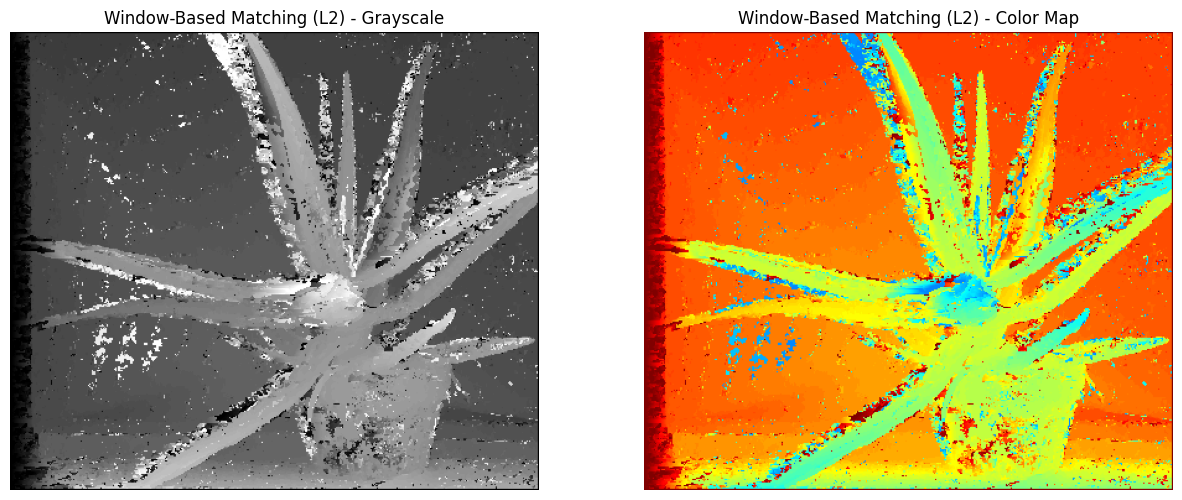

In [20]:
left_img_path = '/content/drive/MyDrive/AI/Bai_tap/Project/Aloe/Aloe_left_1.png'
right_img_path = '/content/drive/MyDrive/AI/Bai_tap/Project/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3

# Tính toán bằng phương pháp L1
window_based_result_l1 = window_based_matching_l1(left_img_path, right_img_path, disparity_range, kernel_size)

# Tính toán bằng phương pháp L2
window_based_result_l2 = window_based_matching_l2(left_img_path, right_img_path, disparity_range, kernel_size)

# Hiển thị kết quả cho phương pháp L1
display_side_by_side(window_based_result_l1, window_based_result_l1,
                     title1='Window-Based Matching (L1) - Grayscale',
                     title2='Window-Based Matching (L1) - Color Map')

# Hiển thị kết quả cho phương pháp L2
display_side_by_side(window_based_result_l2, window_based_result_l2,
                     title1='Window-Based Matching (L2) - Grayscale',
                     title2='Window-Based Matching (L2) - Color Map')

In [ ]:
# Problem 3

Saving result...
Done.
Saving result...
Done.


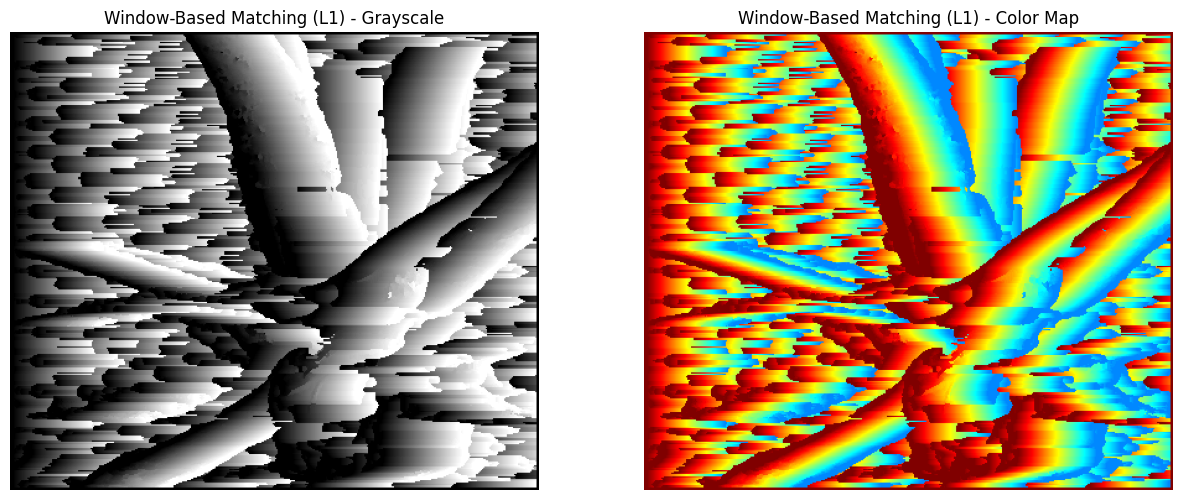

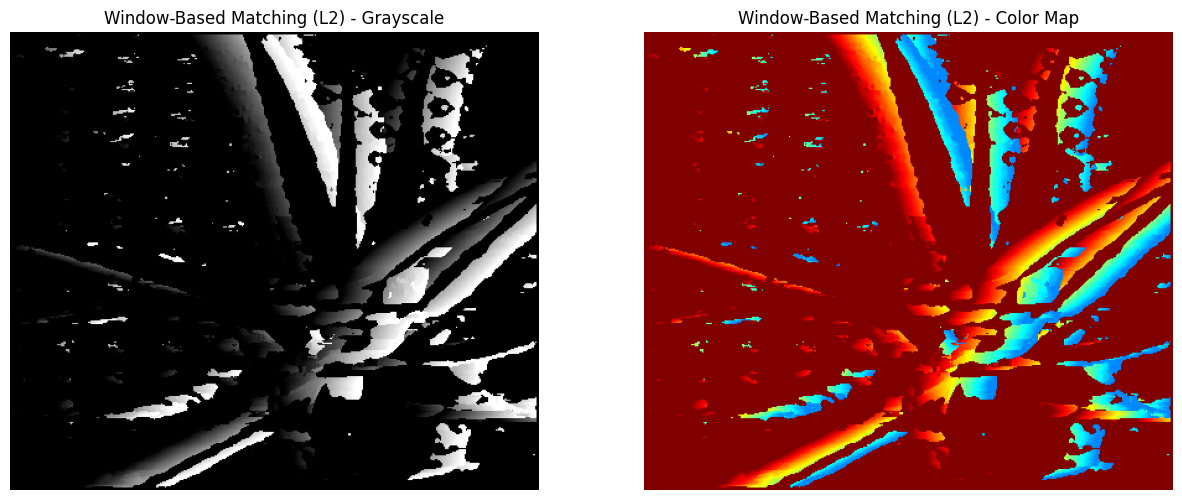

In [22]:
left_img_path = '/content/drive/MyDrive/AI/Bai_tap/Project/Aloe/Aloe_left_1.png'
right_img_path = '/content/drive/MyDrive/AI/Bai_tap/Project/Aloe/Aloe_right_2.png'
disparity_range = 64
kernel_size = 5

# Tính toán bằng phương pháp L1
window_based_result_l1 = window_based_matching_l1(left_img_path, right_img_path, disparity_range, kernel_size)

# Tính toán bằng phương pháp L2
window_based_result_l2 = window_based_matching_l2(left_img_path, right_img_path, disparity_range, kernel_size)

# Hiển thị kết quả cho phương pháp L1
display_side_by_side(window_based_result_l1, window_based_result_l1,
                     title1='Window-Based Matching (L1) - Grayscale',
                     title2='Window-Based Matching (L1) - Color Map')

# Hiển thị kết quả cho phương pháp L2
display_side_by_side(window_based_result_l2, window_based_result_l2,
                     title1='Window-Based Matching (L2) - Grayscale',
                     title2='Window-Based Matching (L2) - Color Map')